<div style="background-color:dodgerblue;height:100px;"><br>
<center><h1><font style="color:white">The Path to Self-Discovery: Find Habits</font></h1></center>
</div>

# Deja Vu

Let's bring our data back!  Before, we loaded our DataFrame from a list of dictionaries.  Now, let's load it from a csv!

In [1]:
import pandas as pd
df = pd.read_csv('./MyStructuredSearch.csv')

## Exercise 1

Remember when we cast our Lat, Lon, and Datestamp columns to the right datatypes?  Let's do it again!

In [2]:
df['Lat'] = df['Lat'].astype(float)
df['Lon'] = df['Lon'].astype(float)
df['Datestamp'] = pd.to_datetime(df['Datestamp'])

# The Apply Function

Pandas has a wonderful transform function called the apply button.  It allows us to perform an operation against an entire Series, DataFrame, or Panel.

To show us how great it is, let's grab the weekday of each of our dates, so that we can more easily specify and filter by day.

First step: make a function that, given a datetime, will return its weekday. Note, 0 is Monday in Python land.

In [3]:
def get_weekday(val):
    if not pd.isnull(val):
        return val.weekday()
    else:
        return None

Now, we can apply that to our Datestamp column, and make a new column!

In [4]:
df['Weekday'] = df['Datestamp'].apply(get_weekday)

Let's better understand what weekdays have the most searches.

In [5]:
df['Weekday'].value_counts()

0    416
1    375
2    355
3    211
5    137
6    127
4     95
Name: Weekday, dtype: int64

And we can plot this to better understand what our data is telling us!

We won't go too detailed into plotting, but we can very easily make some histograms with pandas.

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


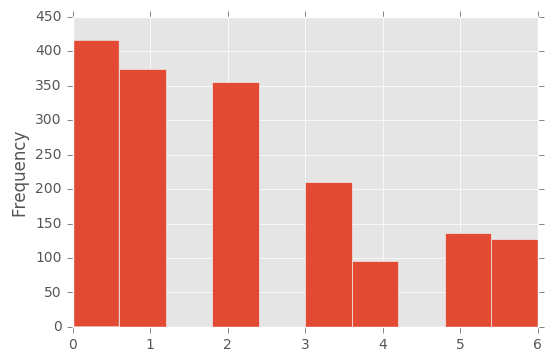

In [7]:
df['Weekday'].plot('hist')

It looks like Mondays and Wednesdays, famously the least enjoyable days of the week, are also the days most searches are done.

## Exercise 7

What are the top days of the week during which the user searched for directions.
* Make a function that determines whether or not the search is for directions
* Filter for all rows where directions were searched for
* Plot the days of the week and number of times directions were searched each day

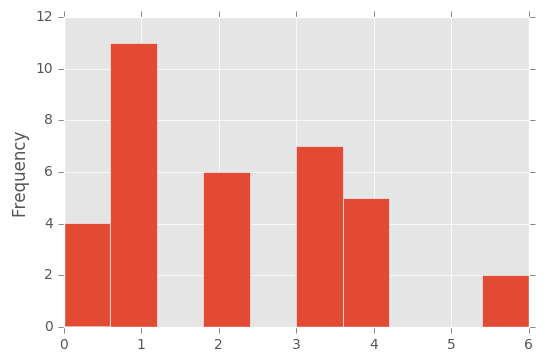

In [9]:
def is_directions(val):
    if type(val)==str:
        return val.lower().startswith('directions to')
    else:
        return False
    
directions = df[df['Target'].apply(is_directions)]
directions['Weekday'].plot('hist')

## Exercise 8

What are the top hours of the day during which the user is on his/her phone?

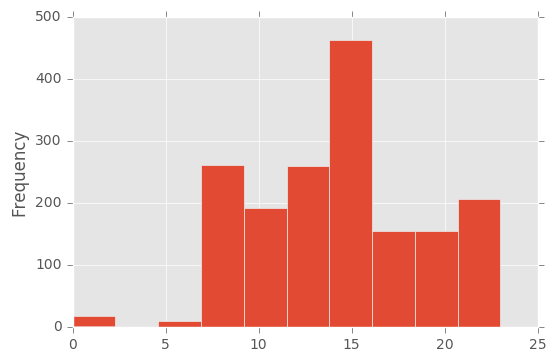

In [12]:
def get_hour(val):
    if not pd.isnull(val):
        return val.hour
    else:
        return None
    
df['Hour'] = df['Datestamp'].apply(get_hour)
df['Hour'].plot('hist')

## Exercise 9

Create a column that identifies the website for each Visited activity.

`https://productforums.google.com/forum/` 

would be parsed as 

`productforums.google.com`

Then find the most visited site.

In [14]:
import re

site_p = re.compile('://(.+?)/')

def get_site(val):
    m = re.search(site_p, val)
    if m:
        return m.group(1)
    else:
        return None
    
df['Site'] = df['Target'].apply(get_site)
df['Site'].mode()

0    stackoverflow.com
dtype: object

# Location, Location

As our last little neat skill, let's learn about distance!  First, let's calculate the centroid of the points.

In [15]:
avg_lat = df['Lat'].mean(skipna=True)
avg_lon = df['Lon'].mean(skipna=True)
avg_loc = (avg_lat, avg_lon)

Python's Anaconda distribution has a great library called geopy that we can use to calculate the distance between two points!  For example, let's take the two ends of I-95: Miami, FL and Houlton, ME.

We can use the Vincenty method.  According to the great Wikipedia: "Vincenty's formulae are two related iterative methods used in geodesy to calculate the distance between two points on the surface of a spheroid, developed by Thaddeus Vincenty (1975a)."

In [16]:
from geopy.distance import vincenty

miami = (25.7617, 80.1918)
houston = (46.135256, 67.781246)

dist = vincenty(miami, houston)
print(dist.miles)
print(dist.meters)

1563.1414786888304
2515632.360839848


Now let's make a function that calculates a coordinates distance from the centroid!

In [17]:
def dist_from_centroid(ser):
    if not pd.isnull(ser['Lat']):
        lat = ser['Lat']
        lon = ser['Lon']
        coord = (lat, lon)
        return vincenty(coord, avg_loc).miles
    return None

Now we want to use the apply function, but we want to use it across a set of multiple columns.  Fortunately, we can call apply on a whole DataFrame, not just a column!  We just have to tell pandas which axis we want to use, since by default, it will move along the 0th (or columnar) axis, rather than the rows (axis 1).

In [18]:
df['Distance From Centroid'] = df.apply(dist_from_centroid, axis=1)

## Exercise 10
What was the location furthest from the centroid?  What were the searches made at this location?

In [24]:
furthest = df[df['Distance From Centroid']==df['Distance From Centroid'].max()]
print(furthest[['Lat', 'Lon']].drop_duplicates())
furthest['Target'].value_counts()

            Lat        Lon
1421  34.552794 -79.435186


nc state best programs      1
best colleges for botany    1
Name: Target, dtype: int64

The last piece of pandas we are going to explore is the `groupby` function.  This function allows us to group the data by one or more columns.  Basically, it creates little DataFrames associated with each of the groups.  Then we can perform operations on each of those and zip the results back up to each group!  

In [25]:
df.groupby(['Lat', 'Lon']).size().head()

Lat        Lon       
34.543727  -79.249273    1
34.552794  -79.435186    2
34.553374  -79.430387    2
           -79.430364    3
34.553496  -79.430418    2
dtype: int64

To make this more useful, we can sort the data as well (which we can do for Series, DataFrames, etc).

In [26]:
df.groupby(['Lat', 'Lon']).size().sort_values(ascending=False).head()

Lat        Lon       
39.105718  -77.157550    388
38.913474  -77.002429    194
38.913337  -77.001765     25
38.922177  -77.020175     25
38.916431  -76.997355     25
dtype: int64

# Dig Deep

Using what you have learned, dig into the data and find out some cool stuff!

Share what you learned here!

https://docs.google.com/forms/d/e/1FAIpQLSexLLJ3N64y7GnyXnLcbJxMxPiJOErBjtPorwb4uw8Q7novlw/viewform?usp=sf_link

## Visualizing Data in the Context of Location

We can also learn a lot about the locations that someone searches in if we look at the searches by location.  Let's pop over to a visualization tool to plot our points.

For an easy tool that lets you plot and color on an attribute, you can use https://www.google.com/mymaps.  They already have all this data anyways :)

## Clustering

Now looking at the data, we can clearly see that there are two distinct groups of points- one in the DC area and one in the North Carolina area.  We want to group these together, but how do we do so in an automated way that doesn't require our eyes? 

Clustering!  Clustering allows us to group a series of data points together based on their attributes.  Clustering can be done based on a variety of attributes.  In this case, we will be using the K-Means clustering method.  With k-means, we tell the algorithm how many clusters we want to create, and in turn, it tries to calculate that number of clusters, using the criteria that the group of points be one in which the distance from the centroid is minimized.

To do k-means, we will be using the scikitlearn library, which is Python's go to for machine learning.

In [27]:
from sklearn.cluster import KMeans
import numpy as np

To start, we need to grab just the latitudes and longitudes from our data.  Then, we can simply throw them into the scikitlearn algorithm to calculate our clusters!

In [28]:
X = df[['Lat', 'Lon']].dropna()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X['Cluster No'] = kmeans.labels_
X['Cluster No'].value_counts()

0    504
2    430
1     16
Name: Cluster No, dtype: int64

Now, let's put our cluster number in as an attribute in our data set and visualize!

In [29]:
df['Cluster No'] = X['Cluster No']
df.to_csv('Clustered Points.csv')

In [31]:
df.head()

,Activity Type,Datestamp,Lat,Lon,Product,Target,Weekday,Hour,Site,Distance From Centroid,Cluster No
0,Visited,2017-08-31 21:54:24,NaN,NaN,Search,https://stackoverflow.com/questions/2299022/se...,3,21,stackoverflow.com,NaN,NaN
1,Visited,2017-08-31 21:54:06,NaN,NaN,Search,https://stackoverflow.com/questions/12901979/s...,3,21,stackoverflow.com,NaN,NaN
2,Searched for,2017-08-31 21:54:03,38.913383,-77.001811,Search,sql query multiple servers,3,21,None,7.022226,2.0
3,Visited,2017-08-31 21:53:58,NaN,NaN,Search,https://social.msdn.microsoft.com/forums/sqlse...,3,21,social.msdn.microsoft.com,NaN,NaN
4,Searched for,2017-08-31 21:53:54,38.913384,-77.001803,Search,sql query multiple databases,3,21,None,7.022614,2.0


Now that we have clusters defined for each coordinate, let's try to figure out what these places are.  One way we can do this is by looking at the directions searches to help guess what these clusters are for the user.

In [35]:
df['Directions'] = df['Target'].apply(is_directions)

new_directions = df[df['Directions']==True]

new_directions.groupby(['Cluster No', 'Target']).size()

Cluster No  Target                                         
0.0         directions to all asian massage washingtondc dc     1
            directions to barcelona weston                      1
            directions to home                                 14
            directions to work                                  2
2.0         directions to home                                  3
            directions to warby parker dc washingtondc          1
            directions to washingtondc garden center            1
            directions to work                                 12
dtype: int64

The user did not even search for directions at cluster 1, so we have no information.  But at cluster 0 and cluster 2, which are fairly near each other in the DC area (based on our visualization), we see that there are directoins searches.  At cluster 0, the dominant directions search was for 'home' and at cluster 2, the dominant search was for 'work'.  Thus, we can guess that they are getting directions to one another.  Cluster 0 is closer to the user's work area, and cluster 2 is closer to the home area.

This is just an example of the sort of patterns you can define in search history.  You could identify top locations to get someone's actual home and place of work.  You could look for top searched names, phone numbers, addresses.  It's scary!

## Lesson: Delete your search history and stop letting Google save it.